In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
rhpass=pd.read_csv("scan_freebsd_tcpdump.csv", parse_dates=['Time'])
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,2011-11-18 08:29:23,Tp-LinkT_b5:79:3f,Broadcast,ARP,60,Who has 10.10.10.10? Tell 10.10.10.15
1,2,2011-11-18 08:29:23,Hewlett-_f3:37:a7,Tp-LinkT_b5:79:3f,ARP,42,10.10.10.10 is at 00:11:85:f3:37:a7
2,3,2011-11-18 08:29:23,10.10.10.15,10.10.10.10,TCP,62,1393 > 81 [SYN] Seq=0 Win=65535 Len=0 MSS=1460...
3,4,2011-11-18 08:29:23,10.10.10.10,10.10.10.15,TCP,60,"81 > 1393 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0"
4,5,2011-11-18 08:29:23,10.10.10.15,10.10.10.10,TCP,62,1394 > 8009 [SYN] Seq=0 Win=65535 Len=0 MSS=14...


In [4]:
rhpass["Type"] = rhpass.apply(lambda x: "Client" if x["Source"] == rhpass.irow(0)["Source"] else "Server", axis=1)

In [5]:
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type
0,1,2011-11-18 08:29:23,Tp-LinkT_b5:79:3f,Broadcast,ARP,60,Who has 10.10.10.10? Tell 10.10.10.15,Client
1,2,2011-11-18 08:29:23,Hewlett-_f3:37:a7,Tp-LinkT_b5:79:3f,ARP,42,10.10.10.10 is at 00:11:85:f3:37:a7,Server
2,3,2011-11-18 08:29:23,10.10.10.15,10.10.10.10,TCP,62,1393 > 81 [SYN] Seq=0 Win=65535 Len=0 MSS=1460...,Server
3,4,2011-11-18 08:29:23,10.10.10.10,10.10.10.15,TCP,60,"81 > 1393 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0",Server
4,5,2011-11-18 08:29:23,10.10.10.15,10.10.10.10,TCP,62,1394 > 8009 [SYN] Seq=0 Win=65535 Len=0 MSS=14...,Server


In [6]:
infodata2 = rhpass[['Length','Time','Info']]
infodata2.head()

,Length,Time,Info
0,60,2011-11-18 08:29:23,Who has 10.10.10.10? Tell 10.10.10.15
1,42,2011-11-18 08:29:23,10.10.10.10 is at 00:11:85:f3:37:a7
2,62,2011-11-18 08:29:23,1393 > 81 [SYN] Seq=0 Win=65535 Len=0 MSS=1460...
3,60,2011-11-18 08:29:23,"81 > 1393 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0"
4,62,2011-11-18 08:29:23,1394 > 8009 [SYN] Seq=0 Win=65535 Len=0 MSS=14...


In [7]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

,Length,Info
Time,,
2011-11-18 08:29:23,60,Who has 10.10.10.10? Tell 10.10.10.15
2011-11-18 08:29:23,42,10.10.10.10 is at 00:11:85:f3:37:a7
2011-11-18 08:29:23,62,1393 > 81 [SYN] Seq=0 Win=65535 Len=0 MSS=1460...
2011-11-18 08:29:23,60,"81 > 1393 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0"
2011-11-18 08:29:23,62,1394 > 8009 [SYN] Seq=0 Win=65535 Len=0 MSS=14...


In [8]:
infodata2.resample('T',how=sum).head()

,Length
Time,
2011-11-18 08:29:00,456969
2011-11-18 08:30:00,496357
2011-11-18 08:31:00,4888286
2011-11-18 08:32:00,1274548
2011-11-18 08:33:00,444112


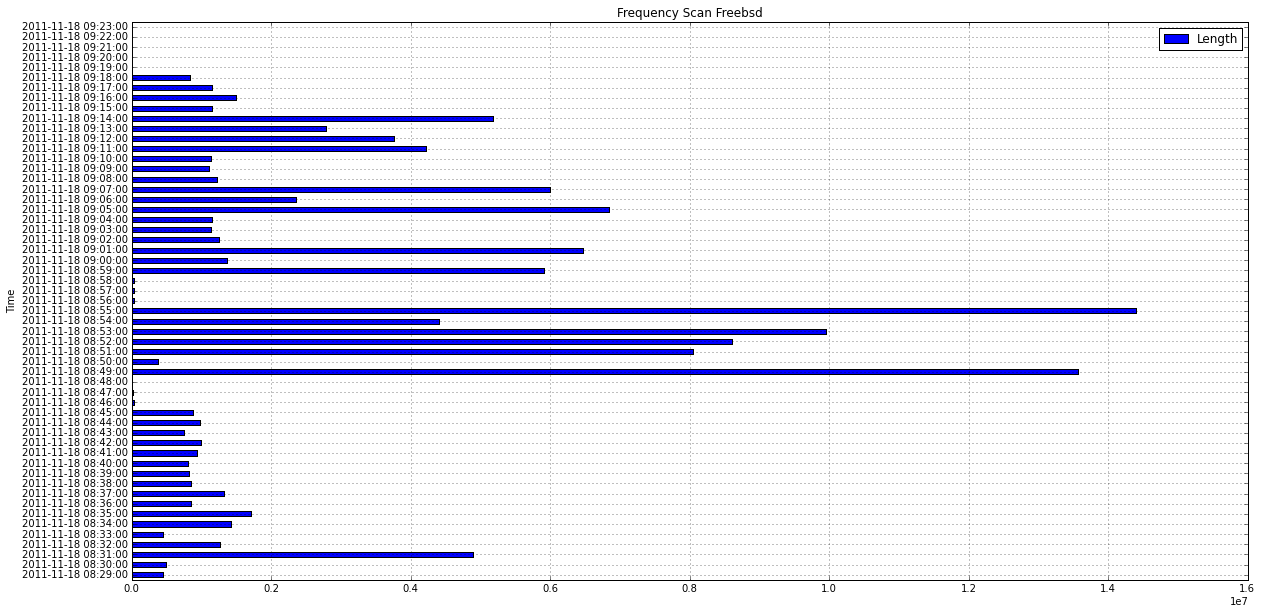

In [9]:
infodata2_plot = infodata2.resample('T',how=sum).plot(kind="barh",title="Frequency Scan Freebsd",figsize=(20,10),legend=True)

In [10]:
fig = infodata2_plot.get_figure()
fig.savefig("Frekuensi Scan Freebsd.png")

In [11]:
rhpass.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type
0,1,2011-11-18 08:29:23,Tp-LinkT_b5:79:3f,Broadcast,ARP,60,Who has 10.10.10.10? Tell 10.10.10.15,Client
1,2,2011-11-18 08:29:23,Hewlett-_f3:37:a7,Tp-LinkT_b5:79:3f,ARP,42,10.10.10.10 is at 00:11:85:f3:37:a7,Server
2,3,2011-11-18 08:29:23,10.10.10.15,10.10.10.10,TCP,62,1393 > 81 [SYN] Seq=0 Win=65535 Len=0 MSS=1460...,Server
3,4,2011-11-18 08:29:23,10.10.10.10,10.10.10.15,TCP,60,"81 > 1393 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0",Server
4,5,2011-11-18 08:29:23,10.10.10.15,10.10.10.10,TCP,62,1394 > 8009 [SYN] Seq=0 Win=65535 Len=0 MSS=14...,Server


In [12]:
category_group=rhpass.groupby(['Source','Destination','Protocol']).sum()
category_group.head()

No.    Length
Source      Destination     Protocol                       
0.0.0.0     255.255.255.255 BOOTP        26582938     14750
10.10.10.10 10.10.10.15     HTTP      25207614562  36122700
                            ICMP         46170955     28584
                            MDNS           589610      1762
                            MySQL      1177504778    532416

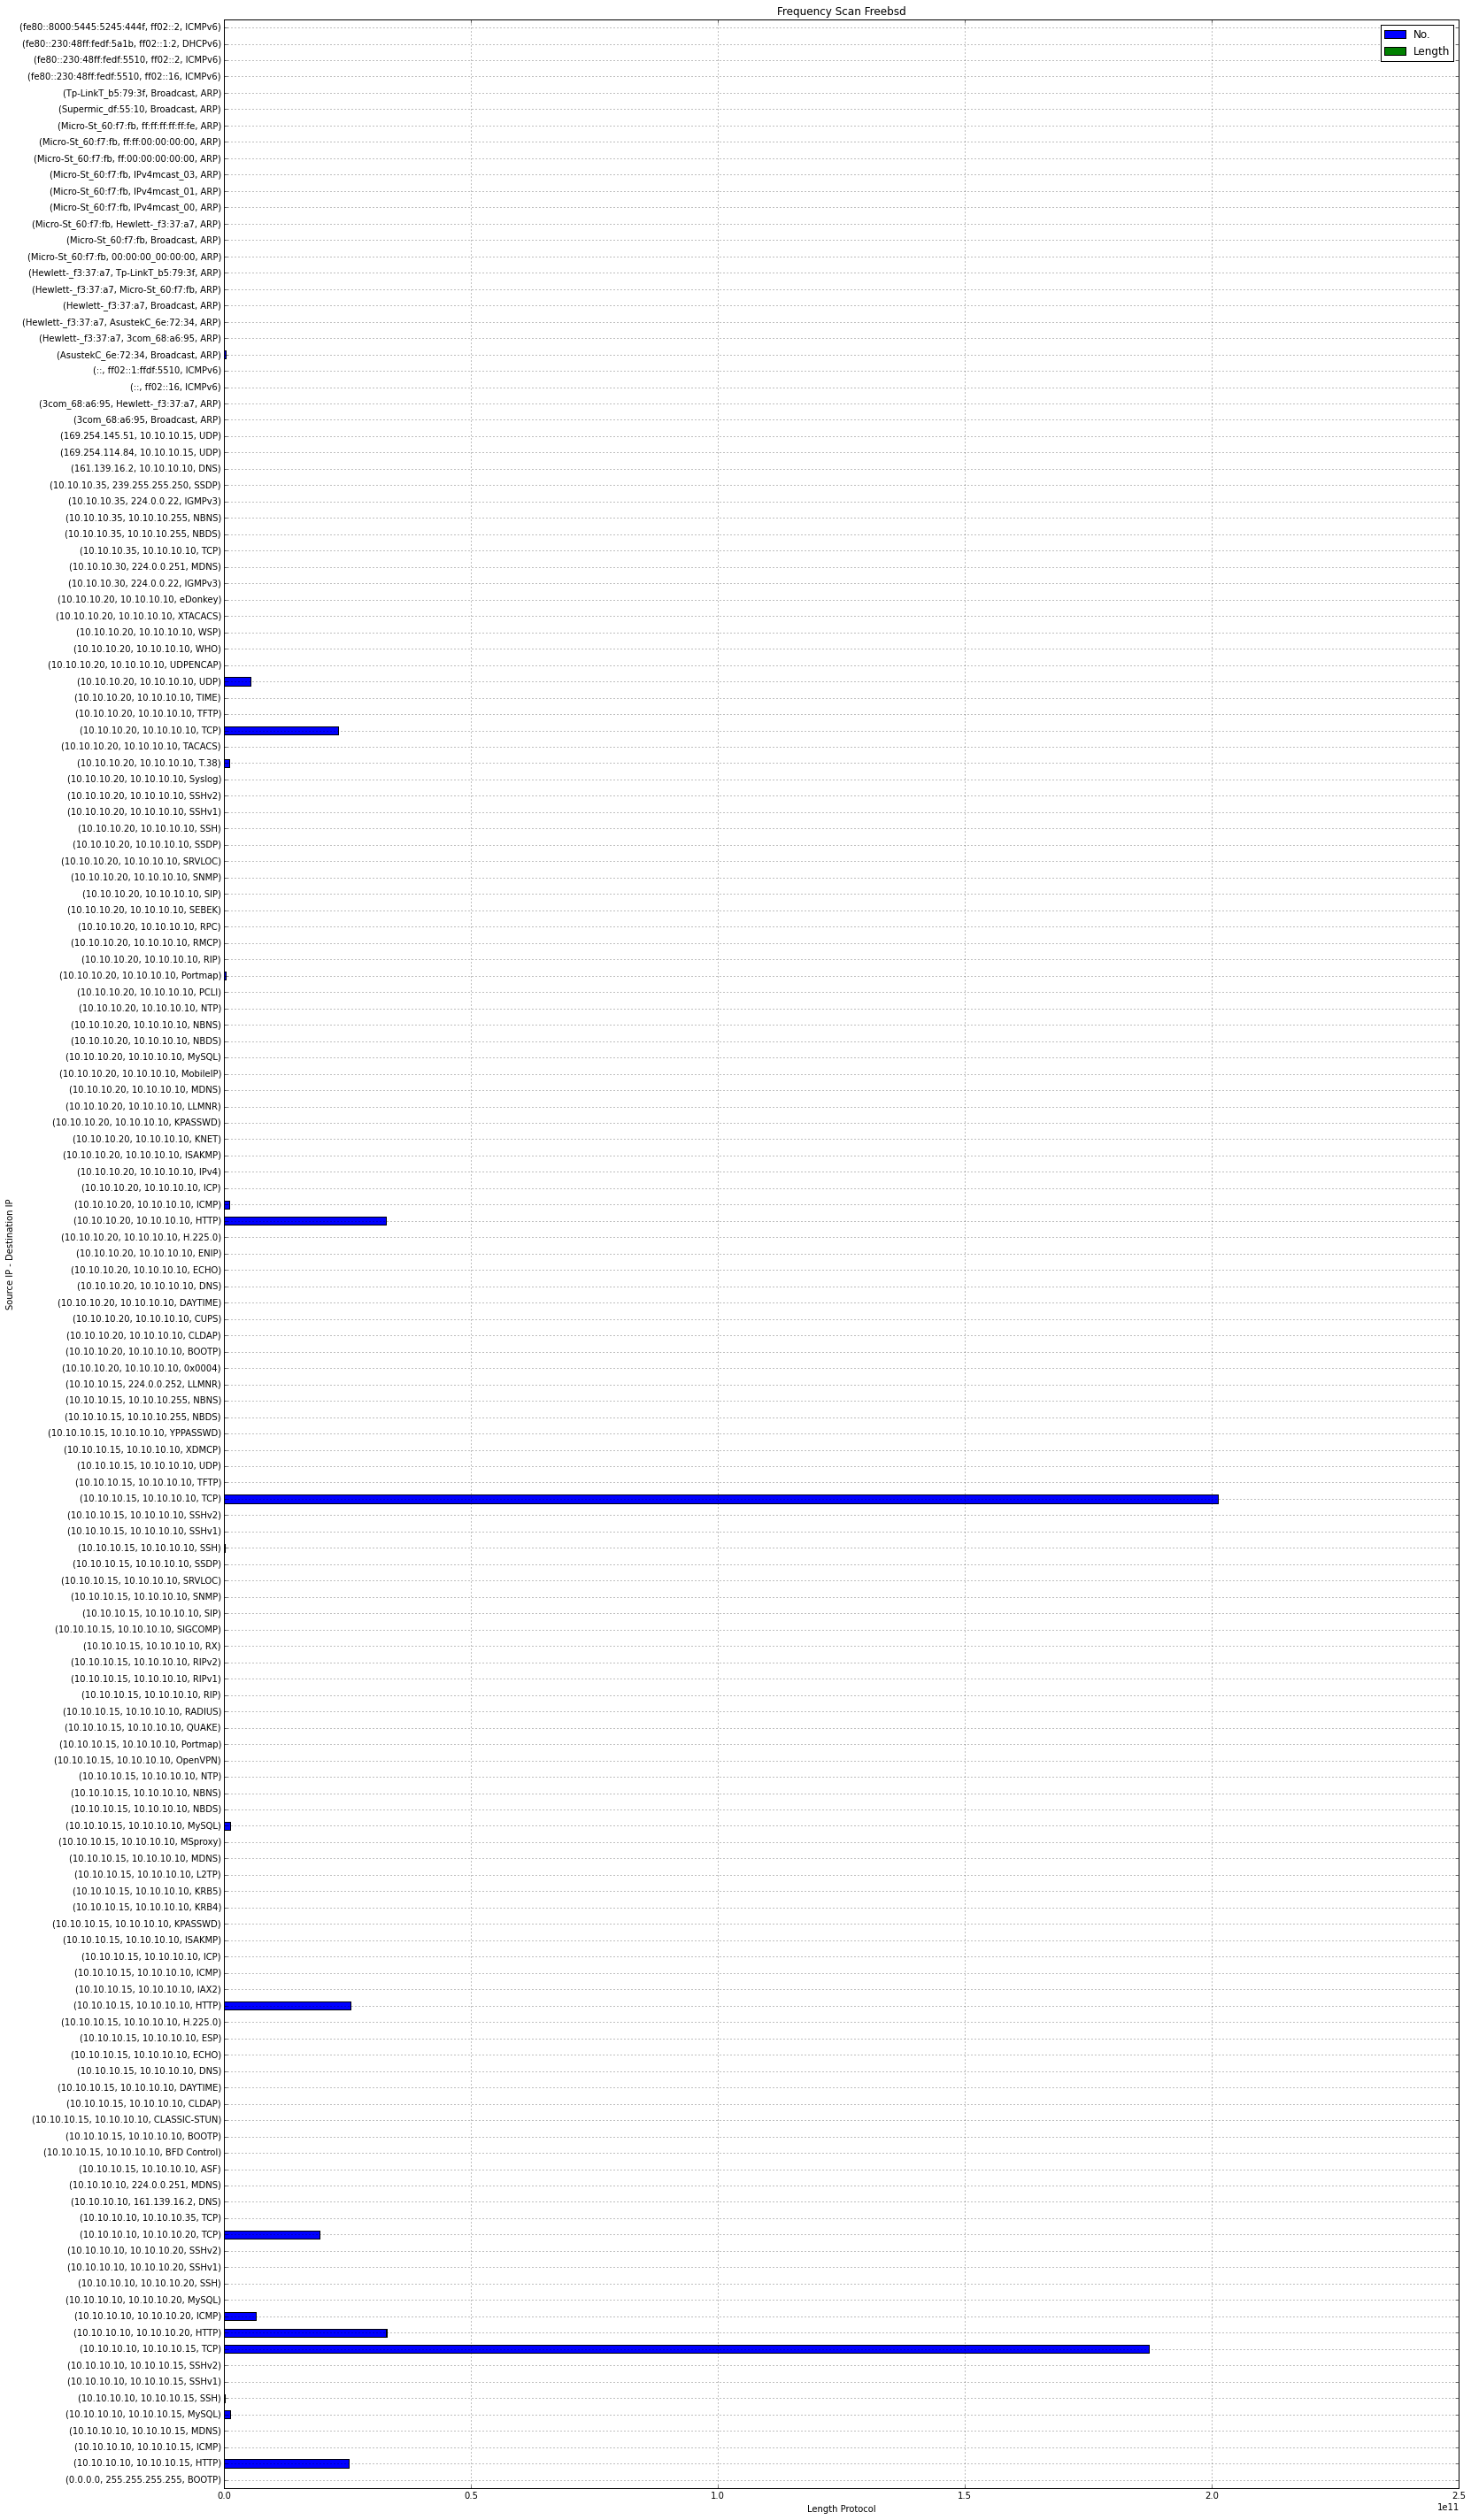

In [13]:
my_plot = category_group.plot(kind='barh',stacked=True,title="Frequency Scan Freebsd",figsize=(25,50))
my_plot.set_xlabel("Length Protocol")
my_plot.set_ylabel("Source IP - Destination IP")

In [14]:
fig = infodata2_plot.get_figure()
fig.savefig("Frekuensi Scan Freebsd.png")

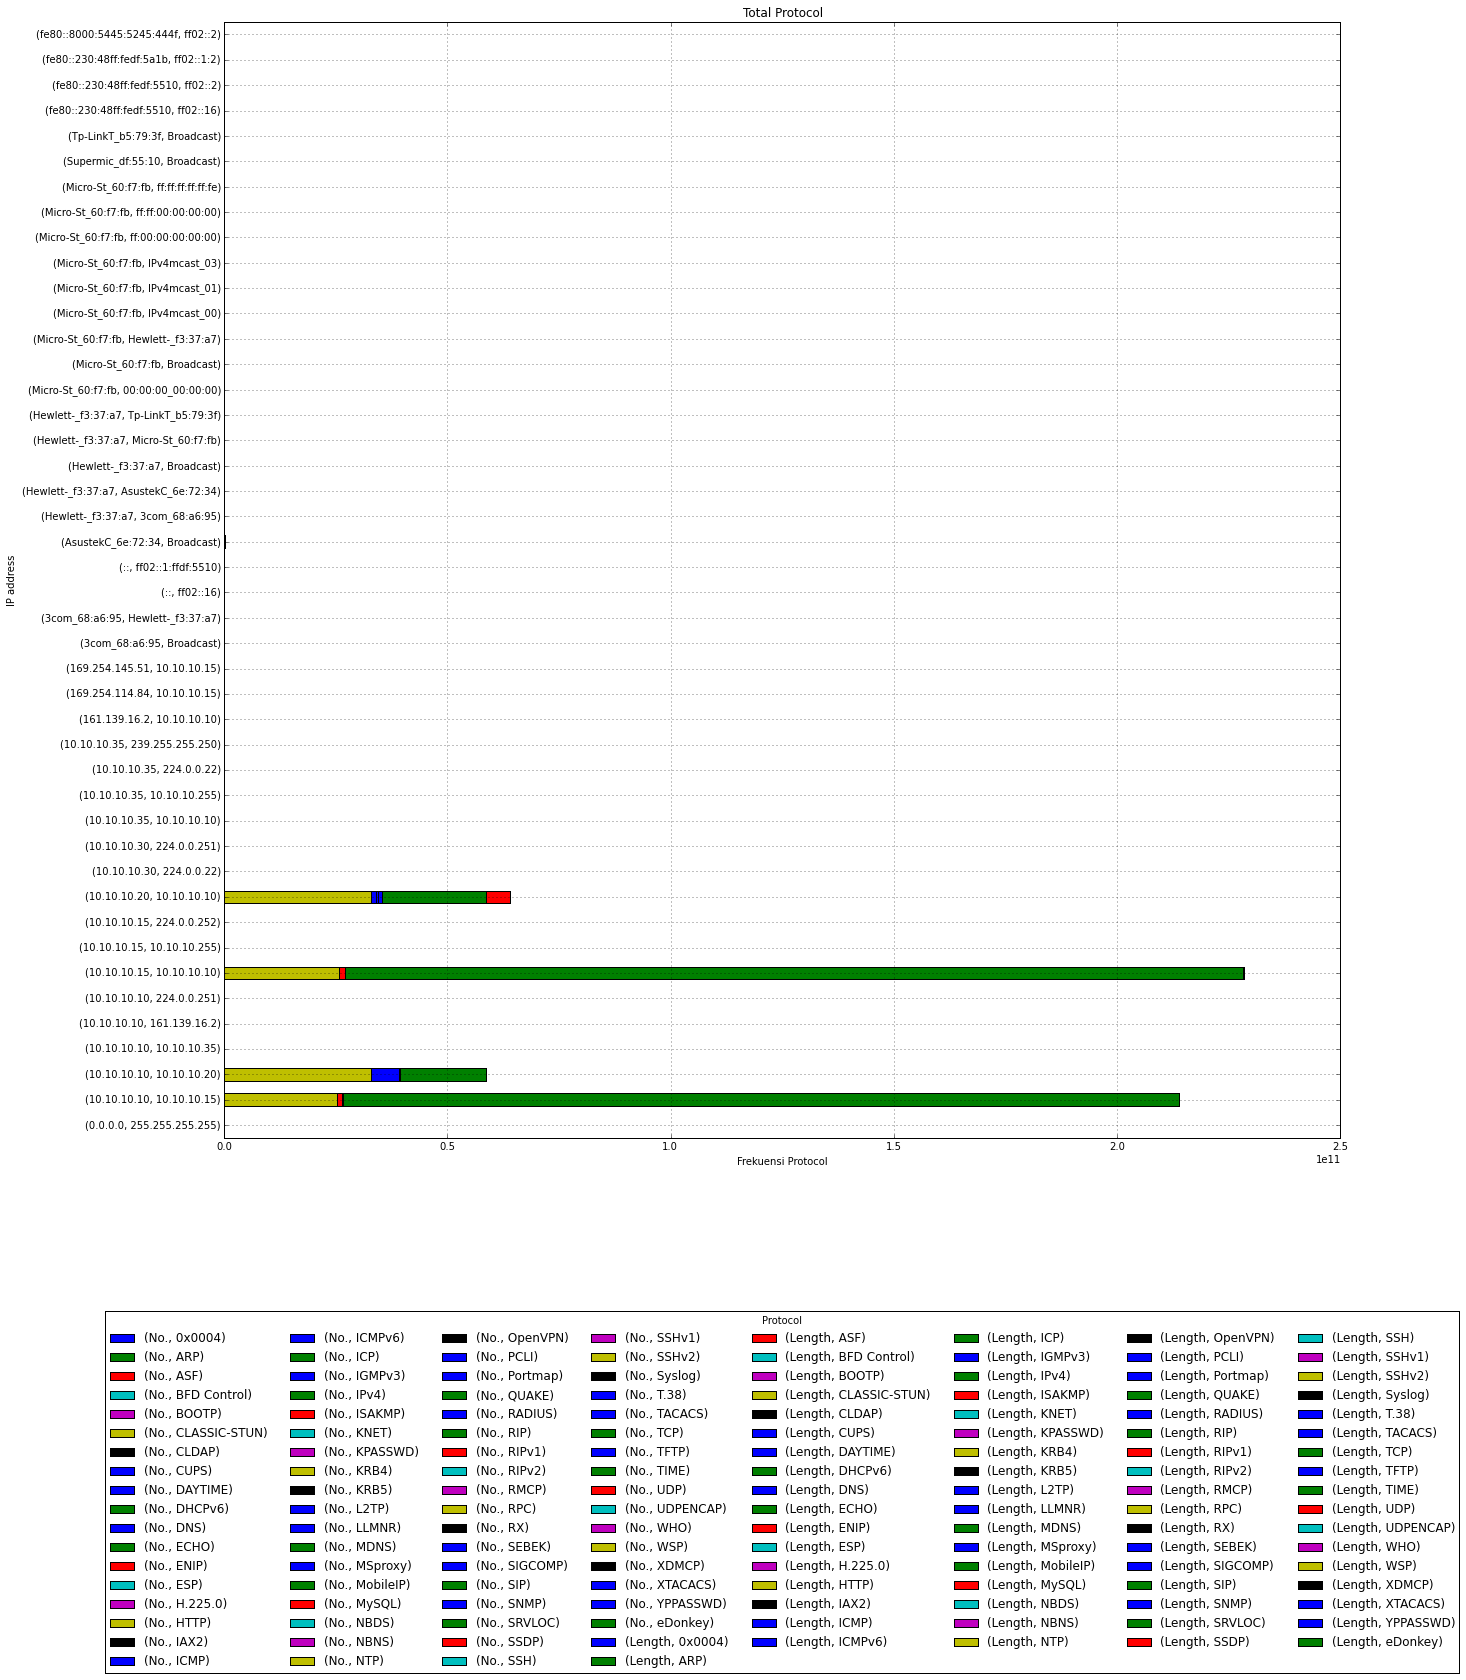

In [15]:
my_plot = category_group.unstack().plot(kind='barh',stacked=True,title="Total Protocol",figsize=(20, 20))
my_plot.set_xlabel("Frekuensi Protocol")
my_plot.set_ylabel("IP address")
patches, labels = my_plot.get_legend_handles_labels()
my_plot.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8, title="Protocol")